**Exploratory Data Analysis(EDA) on Netflix Data**

About Dataset ->
This project involves loading , cleaning, analyzing , and visualizing data from a netflix dataset. we'll use python libraries like pandas , matplotlib , and seaborn to work through the project . The goal is to explore the dataset , derive insights , and prepare for potential machine learning tasks .

**Importing Libraries and Loading Dataset**

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('netflix1.csv')

**Initial Data Exploration**

In [28]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [29]:
#Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [30]:
#rows and columns are present in the dataset
df.shape

(8790, 10)

**Handling Missing Values**

In [32]:
df = df.drop_duplicates()

In [36]:
#Content distribution on Netflix
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [38]:
#checking null values in dataset
df.isnull().mean()*100

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

**Data Visualisation**

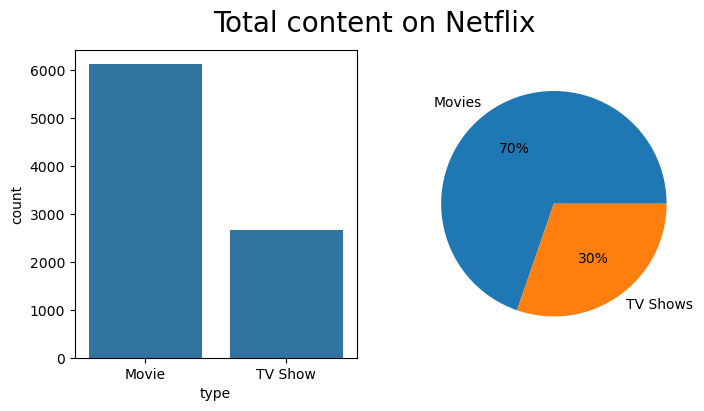

In [40]:
freq = df['type'].value_counts()

fig , axes = plt.subplots(1,2,figsize=(8,4))
sns.countplot(df , x=df['type'] , ax =axes[0])
plt.pie(freq , labels = ['Movies','TV Shows'] , autopct = '%.0f%%')

plt.suptitle("Total content on Netflix",fontsize=20);

By plotting We can see that our Movies present in our dataset almost double the TV Shows .

In [42]:
#Visual representation of rating frequency of movies and TV Shows on Netflix.

rating = df['rating'].value_counts()
rating

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

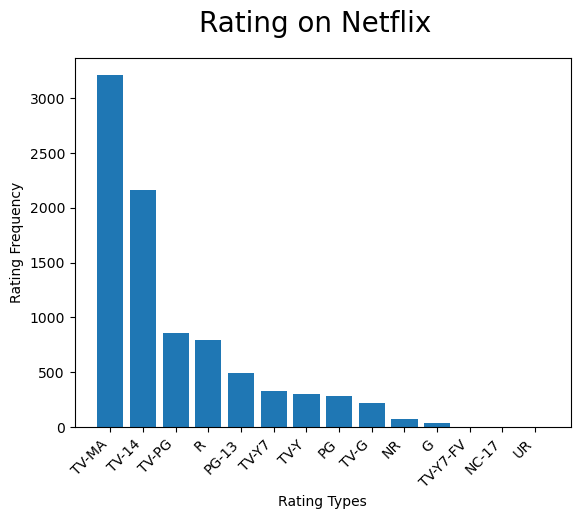

In [43]:
ratings = df['rating'].value_counts().reset_index().sort_values(by='count',ascending = False)
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation= 45 , ha ='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')

plt.suptitle('Rating on Netflix',fontsize = 20);

The Rating Types of the Netflix data have Majority of TV-MA it gets 38% After then TV-14 gets 26% they both gets maximum number rating .

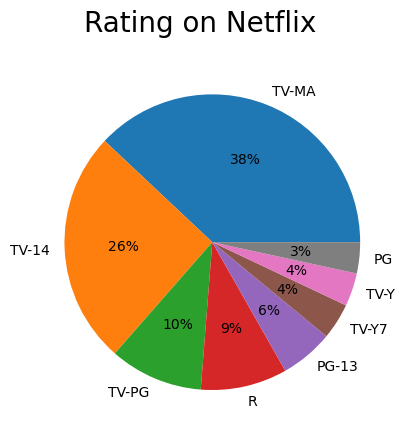

In [74]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct = '%.0f%%')
plt.suptitle('Rating on Netflix ', fontsize = 20);

In [46]:
#Converting date_added column to datetime
#lets convert column date_added to datetime.

df['date_added']= pd.to_datetime(df['date_added'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [49]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

Top 10 Countries with most content on Netflix

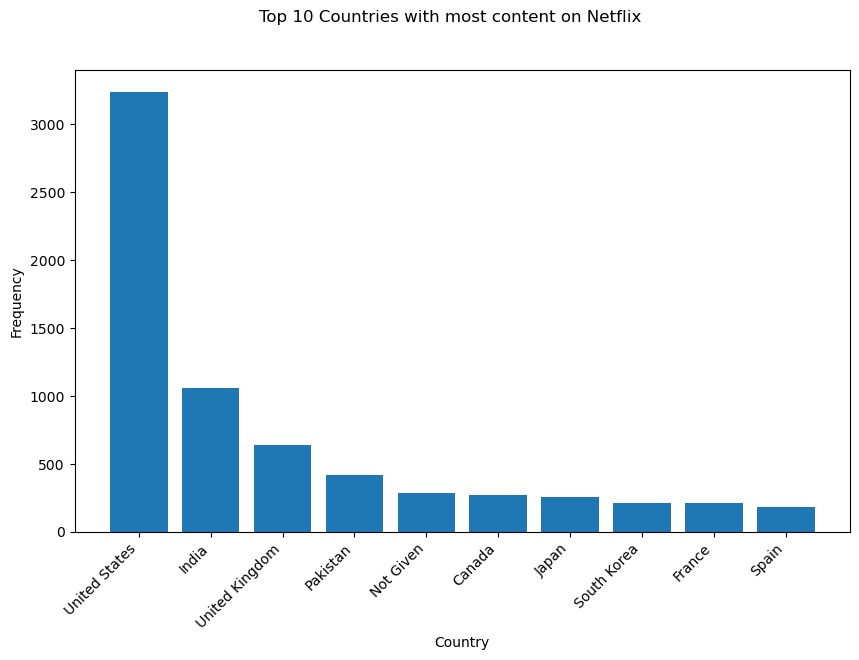

In [51]:
top10 =df['country'].value_counts().reset_index().sort_values(by='count' , ascending = False)[:10]

plt.figure(figsize=(10,6))
plt.bar(top10['country'],top10['count'])
plt.xticks(rotation=45 , ha='right')

plt.xlabel('Country')
plt.ylabel('Frequency')
plt.suptitle("Top 10 Countries with most content on Netflix");

United States presents the most content on Netflix after then India presents content on Netflix .

**Derived Columns**

In [52]:
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

Monthly releases of Movies and TV Shows Netflix

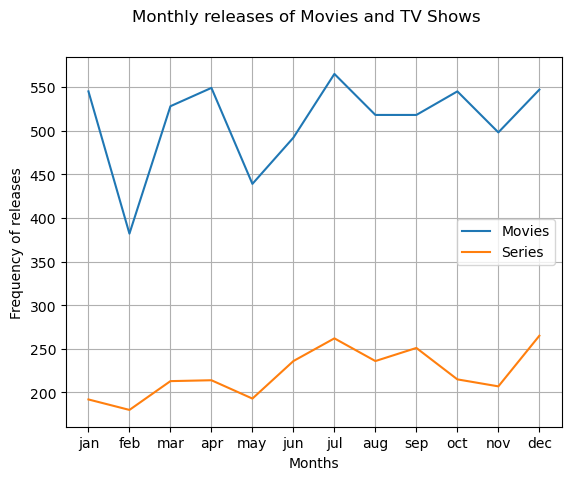

In [56]:
monthly_movies = df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series = df[df['type']=='TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movies.index , monthly_movies.values ,label = 'Movies')
plt.plot(monthly_series.index , monthly_series.values , label = 'Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1,13),['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

plt.grid(True)
plt.legend()
plt.suptitle('Monthly releases of Movies and TV Shows');



We can see that both Movies and TV Shows (Series) have all time high release in the mid of the year (July month) . 

Yearly Release of Movies and TV Shows on Netflix

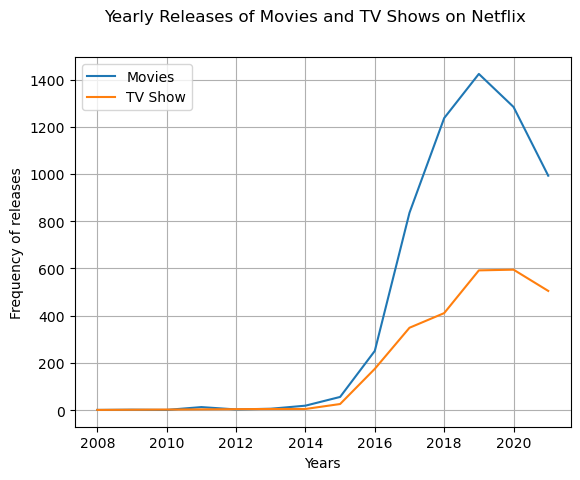

In [58]:
yearly_movie = df[df['type']=='Movie']['year'].value_counts().sort_index()
yearly_series = df[df['type']=='TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie.index , yearly_movie.values , label = 'Movies')
plt.plot(yearly_series.index , yearly_series.values , label = 'TV Show')

plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.grid(True)

plt.suptitle('Yearly Releases of Movies and TV Shows on Netflix')
plt.legend();

After 2015 there is a rise in release Frequency in both Movies and TV Shows . Because of including the rise of binge-watching culture, the evolution of content licensing, and Netflix's own data-driven approach to production and distribution. 

**Top 10 Popular movie genres**

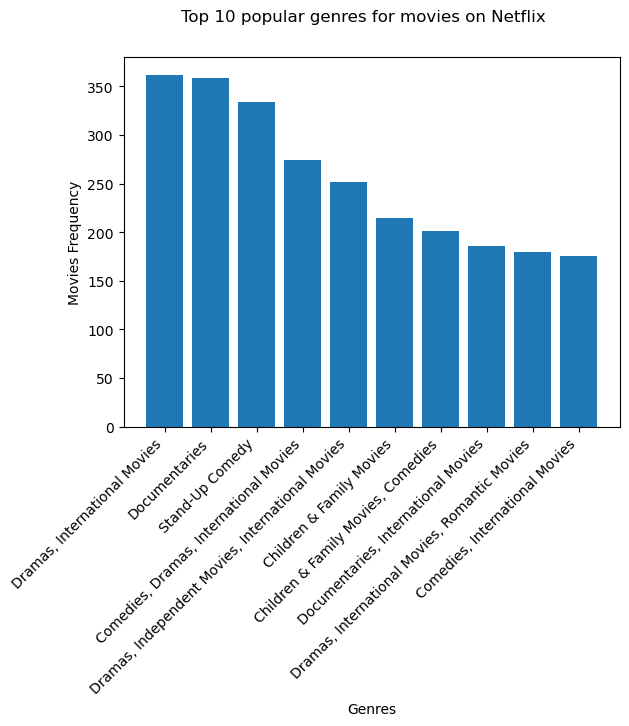

In [61]:
movie_genre = df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]

series_genre = df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(movie_genre.index , movie_genre.values)
plt.xticks(rotation = 45 , ha = 'right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular genres for movies on Netflix')
plt.show()

The 3 top movies Genres are :
1. Dramas , International Movies
2. Documentaries
3. Stand-Up Comedy

**Top 10 TV Shows genres**

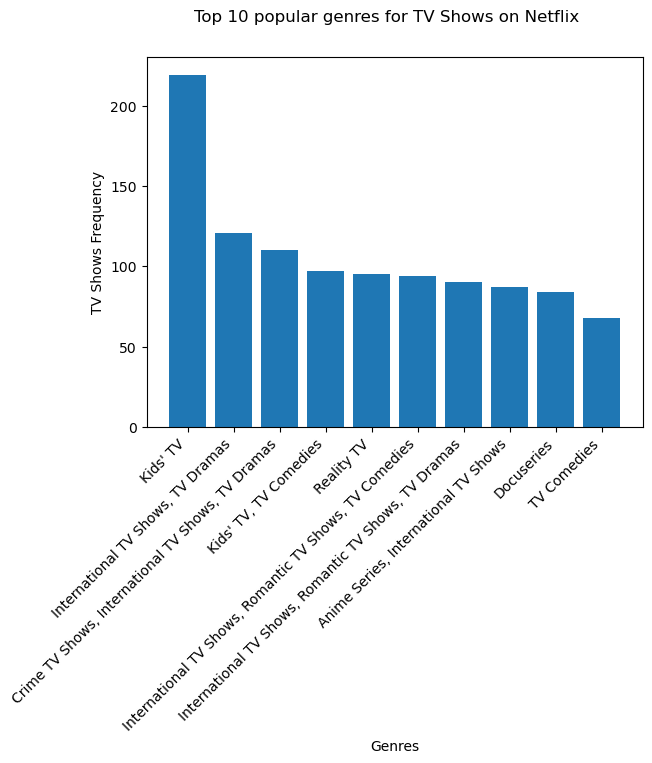

In [77]:
plt.bar(series_genre.index , series_genre.values)
plt.xticks(rotation = 45 , ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Shows Frequency')
plt.suptitle('Top 10 popular genres for TV Shows on Netflix')
plt.show()

Top 3 TV Shows Genres
1. Kids TV
2. International TV Shows , TV Dramas
3. Crime TV Shows 

Top 15 Directors Across Netflix with high frequency of Movies and Shows

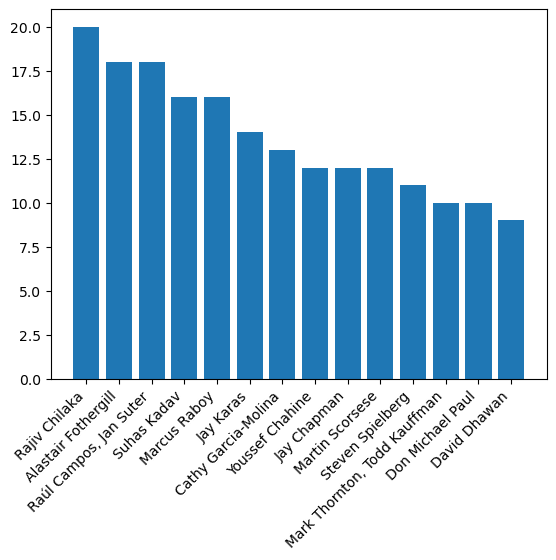

In [65]:
directors = df['director'].value_counts().reset_index().sort_values(by='count',ascending = False)[1:15]

plt.bar(directors['director'],directors['count'])
plt.xticks(rotation = 45 , ha = 'right');

Top 3 Directors on Netflix which releases highest number of Movies and TV Shows .
1. Rajiv Chilaka
2. Alastair Fothergill
3. Raul Campos , Jan Suter

**Conclusion**

Findings from EDA :
1. By plotting We can see that our Movies present in our dataset almost double the TV Shows .
2. The Rating Types of the Netflix data have Majority of TV-MA it gets 38% After then TV-14 gets 26% they both gets maximum number rating .
3. United States presents the most content on Netflix after then India presents content on Netflix .
4. We can see that both Movies and TV Shows (Series) have all time high release in the mid of the year (July month) .
5. After 2015 there is a rise in release Frequency in both Movies and TV Shows . Because of including the rise of binge-watching culture, the evolution of content licensing, and Netflix's own data-driven approach to production and distribution.
6. The 3 top movies Genres are : Dramas , International Movies , Documentaries , Stand-Up Comedy
7. Top 3 TV Shows Genres : Kids TV , International TV Shows , TV Dramas , Crime TV Shows
8. Top 3 Directors on Netflix which releases highest number of Movies and TV Shows : Rajiv Chilaka , Alastair Fothergill , Raul Campos , Jan Suter